In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataPath = "/home/maarten/Documents/doctoraat/code/incremunica-evaluation/data.csv"
df = pd.read_csv(dataPath);

In [3]:
df.head()

,joinAlgorithm,datasetName,matchTransformPercentage,scenarioName,operationName,isTransformation,transformationNr,amountOfAdditions,amountOfDeletions,queryTime(seconds),queryTime(nanoseconds),memoryUsed
0,computational-bind-join,inject-1,30,PosLength,batch pos length,False,0,12,0,0.0,697662186.8,231830112.0
1,computational-bind-join,inject-1,30,PosLength,batch pos length,False,1,132,12,0.0,58203716.2,247745348.8
2,computational-bind-join,inject-1,30,PosLength,batch pos length,False,2,8,8,0.0,83454266.6,248459547.2
3,computational-bind-join,inject-1,30,PosLength,batch pos length,False,3,8,8,0.0,100063019.0,251638795.2
4,computational-bind-join,inject-1,30,PosLength,batch pos length,False,4,8,8,0.0,128391983.4,258558400.0


In [4]:
dfAll = df[df['datasetName'].isin(['batch-1', 'inject-1', 'repair-1'])]
dfAll['queryTime(ms)'] = dfAll['queryTime(seconds)'] * 1000 + dfAll['queryTime(nanoseconds)']/1000000

/tmp/ipykernel_49740/3770206743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAll['queryTime(ms)'] = dfAll['queryTime(seconds)'] * 1000 + dfAll['queryTime(nanoseconds)']/1000000


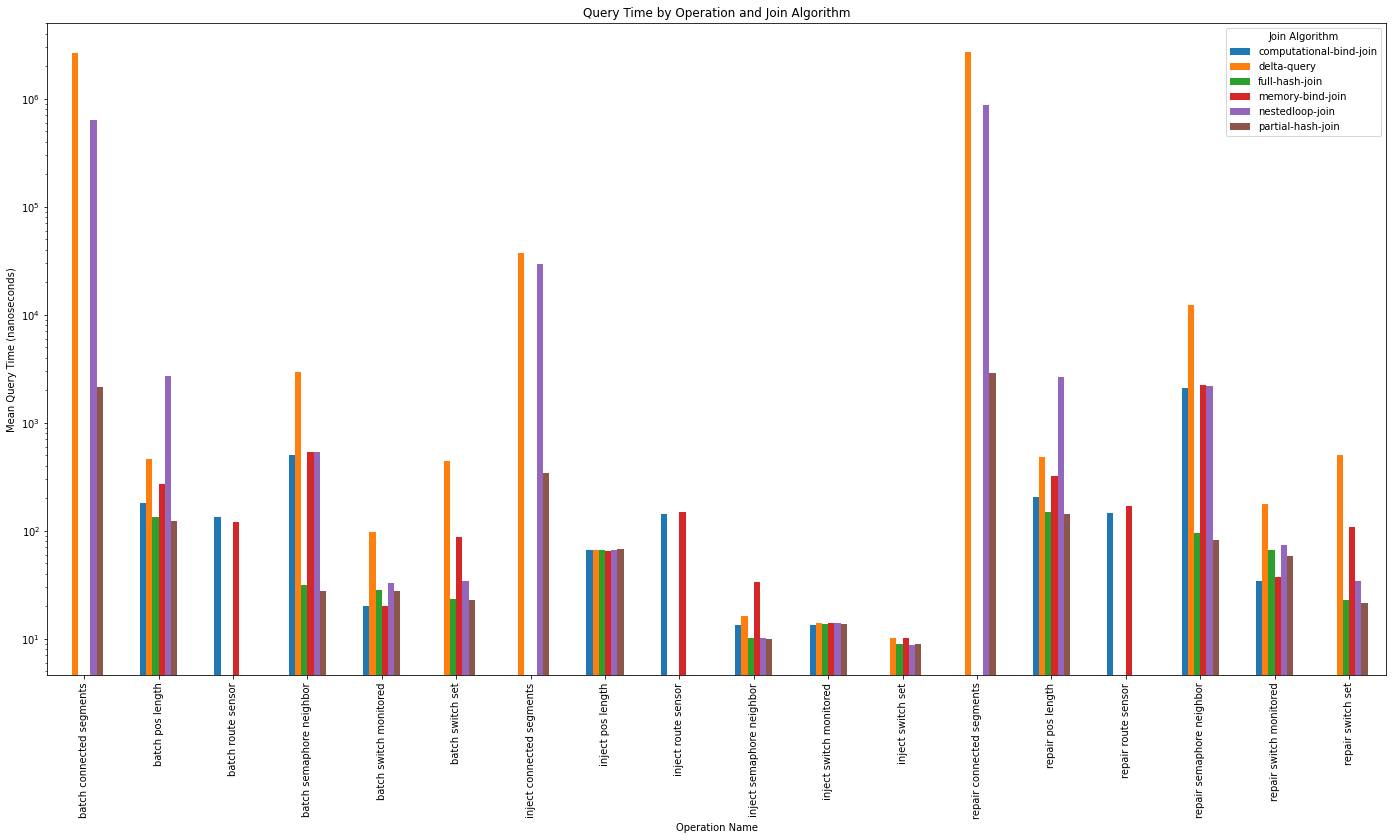

In [7]:
#data = bindJoinsDf[bindJoinsDf['scenarioName'].isin(['PosLength', 'RouteSensor', 'SemaphoreNeighbor', 'SwitchMonitored', 'SwitchSet'])]
grouped_data = dfAll.groupby(['operationName', 'joinAlgorithm'])['queryTime(ms)'].mean().unstack()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = grouped_data.plot(kind='bar', figsize=(24, 12,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean Query Time (nanoseconds)')
plt.title('Query Time by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()

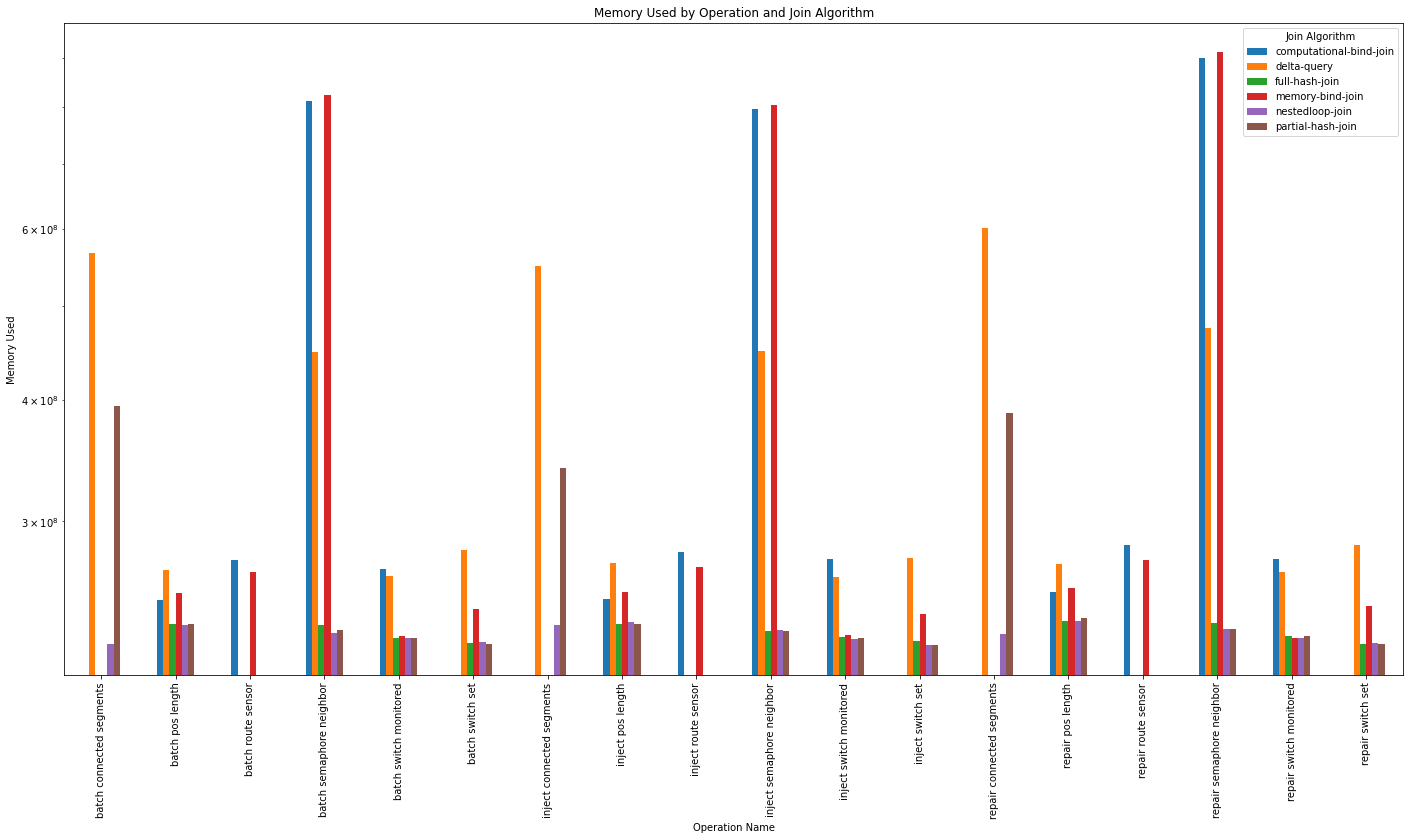

In [8]:
#data = bindJoinsDf[bindJoinsDf['scenarioName'].isin(['PosLength', 'RouteSensor', 'SemaphoreNeighbor', 'SwitchMonitored', 'SwitchSet'])]
grouped_data = dfAll.groupby(['operationName', 'joinAlgorithm'])['memoryUsed'].mean().unstack()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = grouped_data.plot(kind='bar', figsize=(24, 12,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Memory Used')
plt.title('Memory Used by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()